In [50]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings("ignore")

In [51]:
dt=pd.read_csv('/content/Clean_Dataset.csv')

In [52]:
dt.shape

(300153, 12)

In [53]:
dt.isnull().values.any() # boolen methoud to check if there any null values in this dataset false means nothing found , othrewise true means there are null values in this dataset

False

In [54]:
dt.isnull().sum()

NO                  0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [55]:
dt = dt.dropna() # to double check

In [56]:
dt.duplicated(subset=None, keep='first')

0         False
1         False
2         False
3         False
4         False
          ...  
300148    False
300149    False
300150    False
300151    False
300152    False
Length: 300153, dtype: bool

In [57]:
dt.shape

(300153, 12)

In [58]:
dt.info() # checking the data type of every column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   NO                300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [59]:
dt.head()

,NO,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [60]:
dt.tail()

,NO,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585
300152,300152,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,81585


In [61]:
dt.describe() #generate various summary statistics of a DataFrame
#Note: Only features with numeric data are considered

,NO,duration,days_left,price
count,300153.000000,300153.000000,300153.000000,300153.000000
mean,150076.000000,12.221021,26.004751,20889.660523
std,86646.852011,7.191997,13.561004,22697.767366
min,0.000000,0.830000,1.000000,1105.000000
25%,75038.000000,6.830000,15.000000,4783.000000
50%,150076.000000,11.250000,26.000000,7425.000000
75%,225114.000000,16.170000,38.000000,42521.000000
max,300152.000000,49.830000,49.000000,123071.000000


In [62]:
dt.columns = dt.columns.str.replace('Unnamed: 0', 'NO')

In [63]:
dt.columns #check if the name changed

Index(['NO', 'airline', 'flight', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'class', 'duration', 'days_left',
       'price'],
      dtype='object')

In [32]:
dt.describe(include = 'object') #summary statistics for categorical values

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class
count,300153,300153,300153,300153,300153,300153,300153,300153
unique,6,1561,6,6,3,6,6,2
top,Vistara,UK-706,Delhi,Morning,one,Night,Mumbai,Economy
freq,127859,3235,61343,71146,250863,91538,59097,206666


<Axes: xlabel='days_left', ylabel='price'>

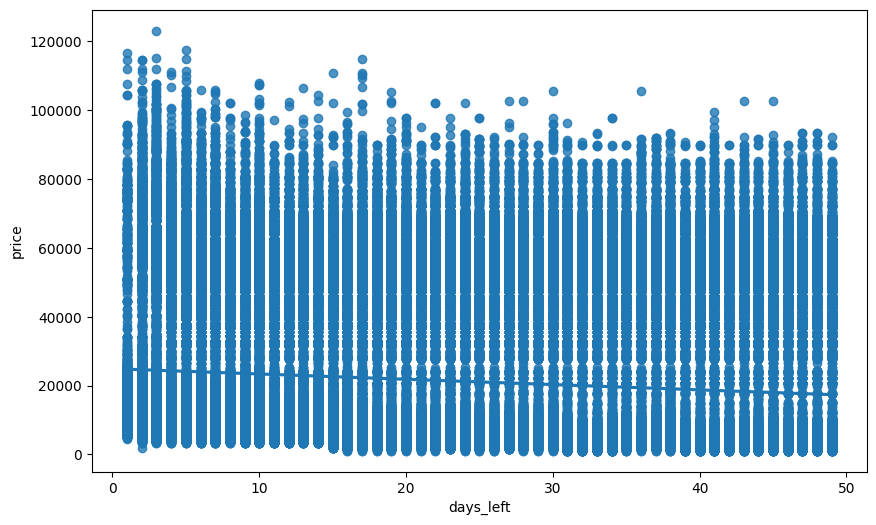

In [33]:
import seaborn as sns #for making statistical graphics
import matplotlib.pyplot as plt #collection of command style functions that make matplotlib work like MATLAB
plt.figure(figsize=(10,6))
sns.regplot(x="days_left", y="price", data=dt)

In [34]:
from scipy import stats
pearson_coef, p_value = stats.pearsonr(dt['days_left'], dt['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is -0.09194853217143865  with a P-value of P = 0.0


<Axes: xlabel='duration', ylabel='price'>

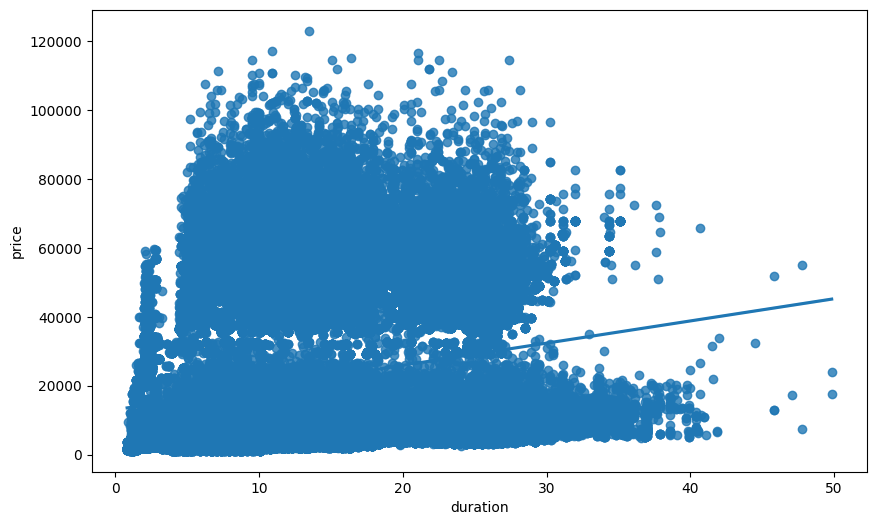

In [35]:
plt.figure(figsize=(10,6))
sns.regplot(x="duration", y="price", data=dt)

In [36]:
pearson_coef, p_value = stats.pearsonr(dt['duration'], dt['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.20422236784542658  with a P-value of P = 0.0


<Axes: xlabel='NO', ylabel='price'>

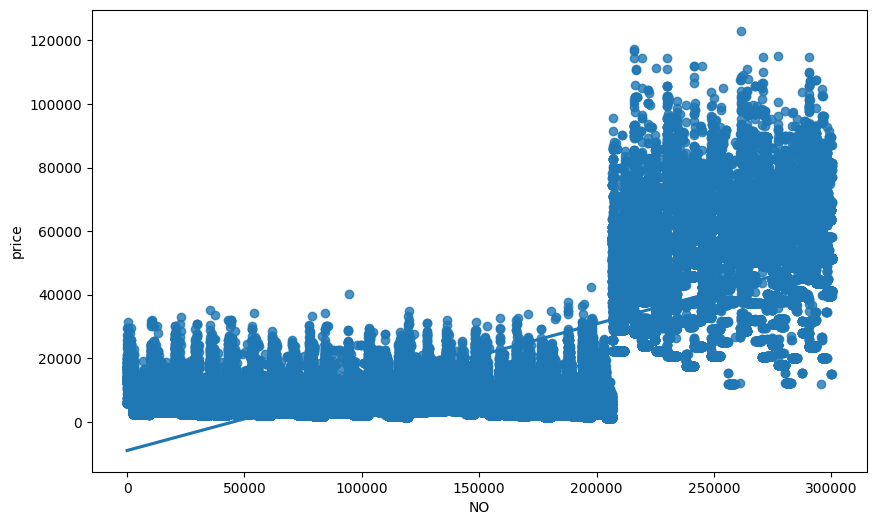

In [64]:
plt.figure(figsize=(10,6))
sns.regplot(x="NO", y="price", data=dt)

In [65]:
pearson_coef, p_value = stats.pearsonr(dt['NO'], dt['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.761177194256035  with a P-value of P = 0.0


In [ ]:
#Box Plot

In [66]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   NO                300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


<Axes: xlabel='airline', ylabel='price'>

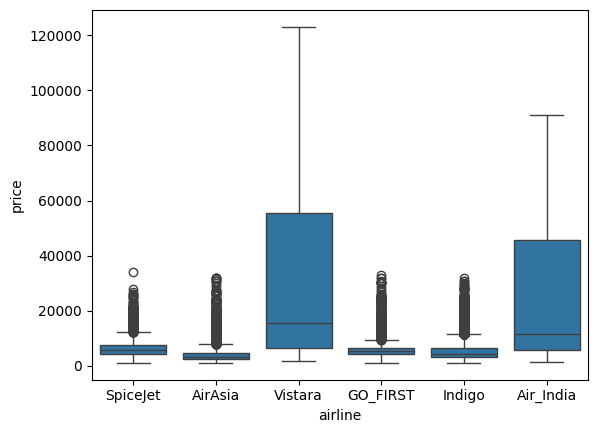

In [67]:
sns.boxplot(x="airline", y="price", data=dt ) #X to metion x-aixs y to metion y-aixs data the dataset name

<Axes: xlabel='flight', ylabel='price'>

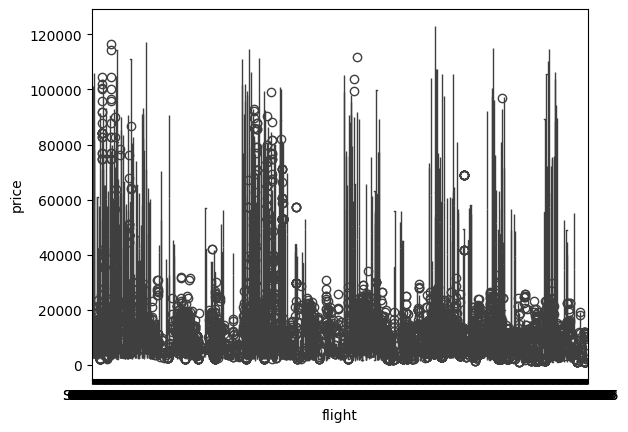

In [68]:
sns.boxplot(x="flight", y="price", data=dt )

<Axes: xlabel='source_city', ylabel='price'>

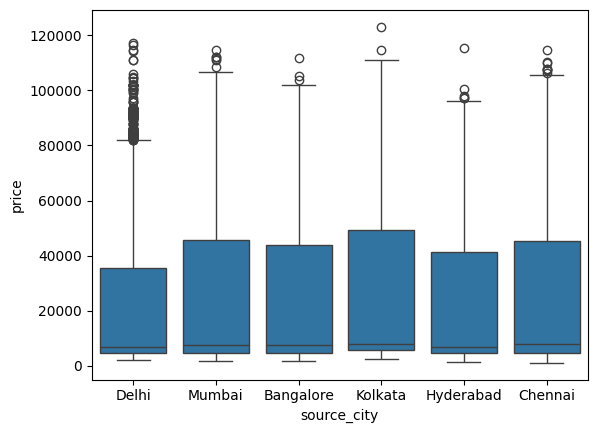

In [69]:
sns.boxplot(x="source_city", y="price", data=dt )

<Axes: xlabel='destination_city', ylabel='price'>

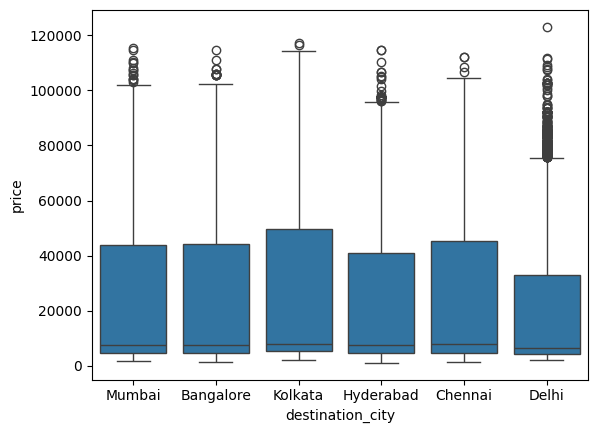

In [70]:
sns.boxplot(x="destination_city", y="price", data=dt )

<Axes: xlabel='departure_time', ylabel='price'>

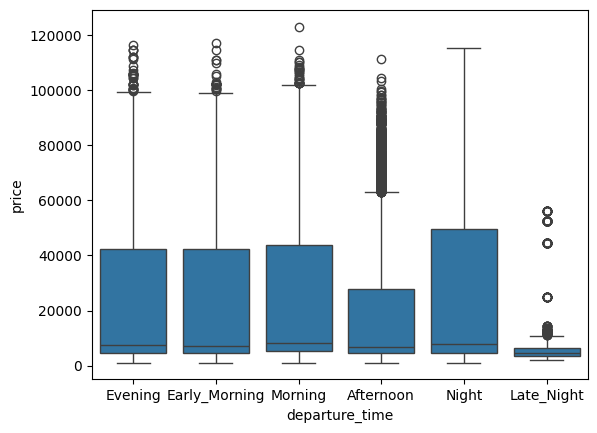

In [71]:
sns.boxplot(x="departure_time", y="price", data=dt )

<Axes: xlabel='stops', ylabel='price'>

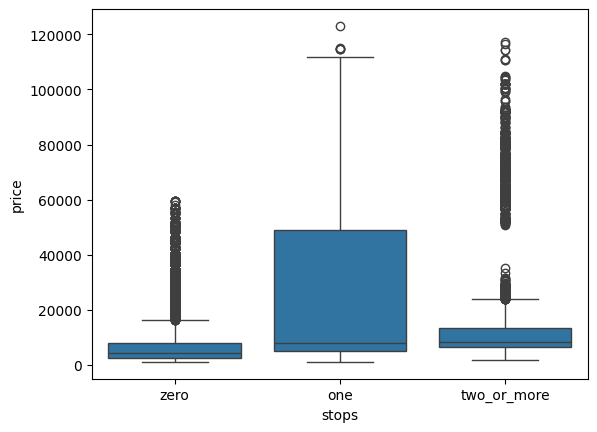

In [72]:
sns.boxplot(x="stops", y="price", data=dt )

<Axes: xlabel='arrival_time', ylabel='price'>

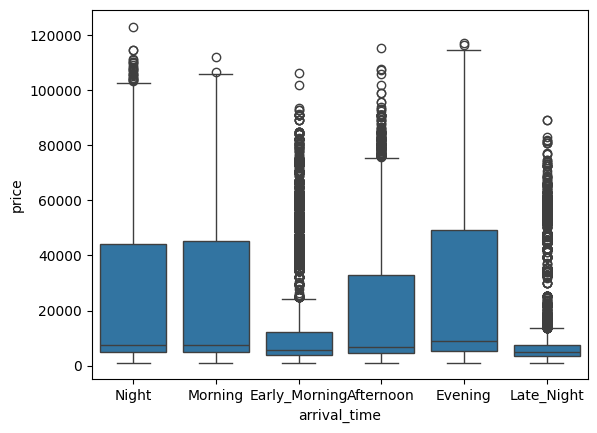

In [73]:
sns.boxplot(x="arrival_time", y="price", data=dt )

<Axes: xlabel='class', ylabel='price'>

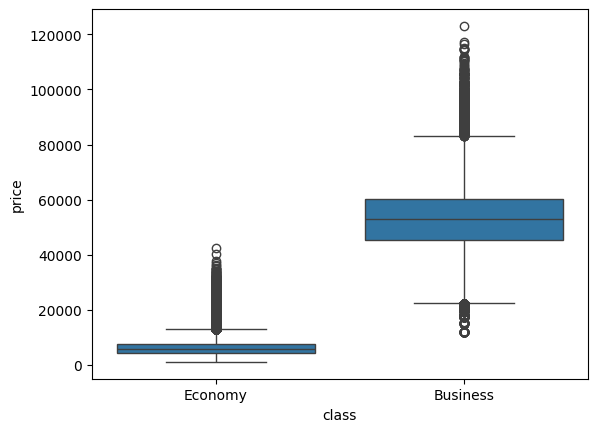

In [74]:
sns.boxplot(x="class", y="price", data=dt )

In [75]:
dt.drop(['NO','flight',], axis = 1, inplace = True)

In [76]:
dt.shape

(300153, 10)

In [ ]:
#Data Transformation

In [77]:
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()
dt.days_left = labelencoder.fit_transform(dt.days_left)
dt.duration=labelencoder.fit_transform(dt.duration)
dt.airline=labelencoder.fit_transform(dt.airline)
dt.source_city=labelencoder.fit_transform(dt.source_city)
dt.departure_time=labelencoder.fit_transform(dt.departure_time)
dt.stops=labelencoder.fit_transform(dt.stops)
dt.arrival_time=labelencoder.fit_transform(dt.arrival_time)
dt.destination_city=labelencoder.fit_transform(dt.destination_city)


In [78]:
dt.columns = dt.columns.str.replace('class', 'class_Type')
#change the name of the feature because it's a keyword

In [79]:
dt.columns = dt.columns.str.replace('class_Type_Type_Type', 'class_Type')

In [80]:
dt.columns #check the columns name

Index(['airline', 'source_city', 'departure_time', 'stops', 'arrival_time',
       'destination_city', 'class_Type', 'duration', 'days_left', 'price'],
      dtype='object')

In [81]:
dt.class_Type=labelencoder.fit_transform(dt.class_Type)

In [82]:
dt.head(10)

,airline,source_city,departure_time,stops,arrival_time,destination_city,class_Type,duration,days_left,price
0,4,2,2,2,5,5,1,16,0,5953
1,4,2,1,2,4,5,1,18,0,5953
2,0,2,1,2,1,5,1,16,0,5956
3,5,2,4,2,0,5,1,17,0,5955
4,5,2,4,2,4,5,1,18,0,5955
5,5,2,4,2,0,5,1,18,0,5955
6,5,2,4,2,4,5,1,15,0,6060
7,5,2,0,2,2,5,1,16,0,6060
8,2,2,1,2,4,5,1,16,0,5954
9,2,2,0,2,2,5,1,17,0,5954


In [83]:
# Calculate the z-score with scipy
import scipy.stats as stats
dt = stats.zscore(dt)

In [84]:
dt # check the result of z socre

,airline,source_city,departure_time,stops,arrival_time,destination_city,class_Type,duration,days_left,price
0,0.488270,-0.329721,-0.237897,2.577006,1.105790,1.382425,0.672576,-1.405317,-1.843875,-0.658068
1,0.488270,-0.329721,-0.807934,2.577006,0.531627,1.382425,0.672576,-1.382385,-1.843875,-0.658068
2,-1.693633,-0.329721,-0.807934,2.577006,-1.190865,1.382425,0.672576,-1.405317,-1.843875,-0.657936
3,1.033746,-0.329721,0.902176,2.577006,-1.765028,1.382425,0.672576,-1.393851,-1.843875,-0.657980
4,1.033746,-0.329721,0.902176,2.577006,0.531627,1.382425,0.672576,-1.382385,-1.843875,-0.657980
...,...,...,...,...,...,...,...,...,...,...
300148,1.033746,-0.900576,0.902176,-0.426792,-0.616701,0.235992,-1.486822,-0.293077,1.695692,2.131285
300149,1.033746,-0.900576,-1.377971,-0.426792,1.105790,0.235992,-1.486822,-0.247212,1.695692,2.476694
300150,1.033746,-0.900576,-0.807934,-0.426792,1.105790,0.235992,-1.486822,0.234377,1.695692,2.564545
300151,1.033746,-0.900576,-0.807934,-0.426792,-0.616701,0.235992,-1.486822,-0.304544,1.695692,2.674071


In [85]:
x_train=dt.iloc[:,0:8]
y_train=dt.iloc[:,9]

In [86]:
x_train.head()#check the train head features

,airline,source_city,departure_time,stops,arrival_time,destination_city,class_Type,duration
0,0.488270,-0.329721,-0.237897,2.577006,1.105790,1.382425,0.672576,-1.405317
1,0.488270,-0.329721,-0.807934,2.577006,0.531627,1.382425,0.672576,-1.382385
2,-1.693633,-0.329721,-0.807934,2.577006,-1.190865,1.382425,0.672576,-1.405317
3,1.033746,-0.329721,0.902176,2.577006,-1.765028,1.382425,0.672576,-1.393851
4,1.033746,-0.329721,0.902176,2.577006,0.531627,1.382425,0.672576,-1.382385


In [87]:
y_train.head()# check the traget variable

0   -0.658068
1   -0.658068
2   -0.657936
3   -0.657980
4   -0.657980
Name: price, dtype: float64

In [88]:
#importing train_test_split from sklearn
from sklearn.model_selection import train_test_split
# splitting the data  # 30% for testing is used
X_train, X_test, Y_train, Y_test = train_test_split(x_train, y_train, test_size = 0.3, random_state = 0)

In [89]:
#Fit Model
#Multiple Linear Regression
#Calling multiple linear regression model and fitting the training set
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model_mlr = model.fit(X_train,Y_train)

In [90]:
Y_pred_MLR = model_mlr.predict(X_test)  #Making price prediction using the testing set (Fit to MLR)

In [91]:
#Calculating the Mean Square Error for MLR model
mse_MLR = mean_squared_error(Y_test, Y_pred_MLR)
print('The mean square error for Multiple Linear Regression: ', mse_MLR)

The mean square error for Multiple Linear Regression:  0.10106434005901507


In [92]:
#Calculating the Mean Absolute Error for MLR model
mae_MLR= mean_absolute_error(Y_test, Y_pred_MLR)
print('The mean absolute error for Multiple Linear Regression: ', mae_MLR)

The mean absolute error for Multiple Linear Regression:  0.21645139854147233


In [93]:
#Random Forest Regressor (checking other Models)
#calling the random forest model and fitting the training data
rfModel = RandomForestRegressor()
model_rf = rfModel.fit(X_train,Y_train)

In [94]:
Y_pred_RF = model_rf.predict(X_test)

In [95]:
#Random Forest Evaluation
#Calculating the Mean Square Error for Random Forest Model
mse_RF = mean_squared_error(Y_test, Y_pred_RF)
print('The mean square error of price and predicted value is: ', mse_RF)

The mean square error of price and predicted value is:  0.02444277807830449


In [96]:
#Calculating the Mean Absolute Error for Random Forest Model
mae_RF= mean_absolute_error(Y_test, Y_pred_RF)
print('The mean absolute error of price and predicted value is: ', mae_RF)

The mean absolute error of price and predicted value is:  0.09549198612276759


In [97]:
scores = [('MLR', mae_MLR),
          ('Random Forest', mae_RF)
         ]

In [98]:
mae = pd.DataFrame(data = scores, columns=['Model', 'MAE Score'])
mae

,Model,MAE Score
0,MLR,0.216451
1,Random Forest,0.095492


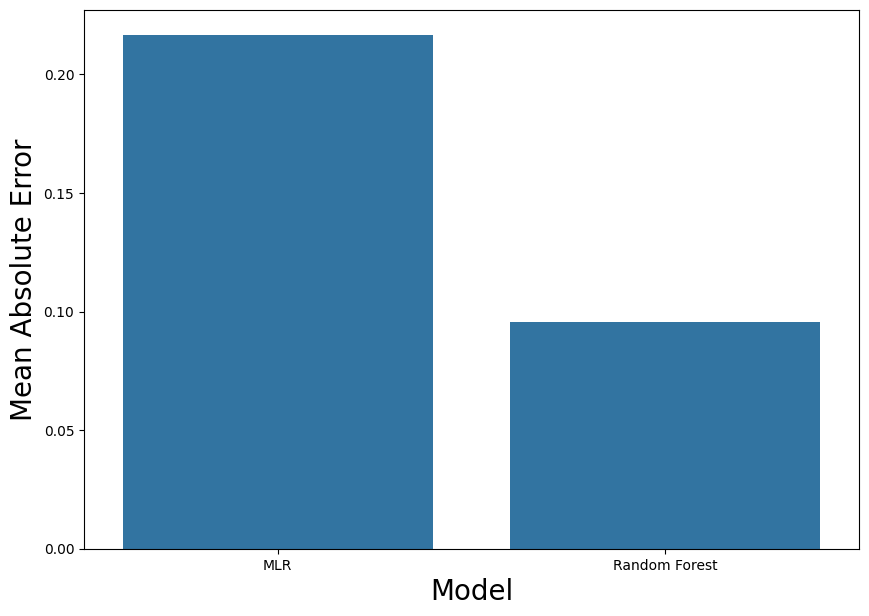

In [99]:
mae.sort_values(by=(['MAE Score']), ascending=False, inplace=True)

f, axe = plt.subplots(1,1, figsize=(10,7))
sns.barplot(x = mae['Model'], y=mae['MAE Score'], ax = axe)
axe.set_xlabel('Model', size=20)
axe.set_ylabel('Mean Absolute Error', size=20)

plt.show()

In [100]:
dt.shape


(300153, 10)